## K-means

调试K，找质心

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

In [10]:
estimators = [
    ('k_means_iris_8', KMeans(n_clusters=8, n_init=1, init='k-means++', random_state=140)),
    ('k_means_iris_3', KMeans(n_clusters=3, n_init=1, init='k-means++', random_state=140)),
    ('k_means_iris_3_random', KMeans(n_clusters=3, n_init=1, init='random', random_state=140))
]
KMeans().fit()

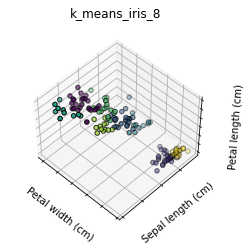

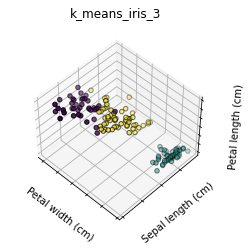

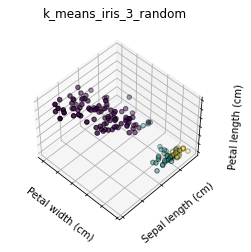

In [13]:
fignum = 0
for name, est in estimators:
    fignum = fignum + 1
    est.fit(X) # 聚类
    # y == labels
    labels = est.labels_
    # 可视化
    fig = plt.figure(num=fignum, figsize=(4,3))
    ax = Axes3D(fig=fig, rect=[0,0,0.95,1], azim=134, elev=48)
    ax.scatter(X[:,3],X[:,0],X[:,2], c=labels, edgecolor='k')
    
    ax.set_title(name)
    ax.set_xlabel('Petal width (cm)')
    ax.set_ylabel('Sepal length (cm)')
    ax.set_zlabel('Petal length (cm)')
    # 隐藏刻度值
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.dist = 12



## 对比

In [14]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [19]:
# 创建不同的数据集
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# 无监督学习
no_structure = np.random.rand(n_samples,2), None

In [18]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.02, right=0.92, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)

<Figure size 576x576 with 0 Axes>

In [21]:
datas = [
    (noisy_circles, {'eps':0.3, 'min_samples':5, 'n_cluster':2}),
    (noisy_moons, {'eps':0.3, 'min_samples':5, 'n_cluster':2}),
    (blobs, {'eps':0.3, 'min_samples':5, 'n_cluster':3}),
    (no_structure, {'eps':0.3, 'min_samples':5, 'n_cluster':3})
]

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_km

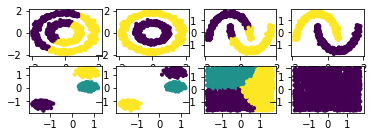

In [33]:
number = 0
for id, (data, params) in enumerate(datas):
    X,y = data
    X = StandardScaler().fit_transform(X)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_cluster'])
    dbscan = cluster.DBSCAN(eps=params['eps'], min_samples=params['min_samples'])

    models = [
        ('MiniBatchKMeans', two_means),
        ('DBSCAN', dbscan)
    ]

    for name, algorithm in models:
        number = number + 1
        algorithm.fit(X)
        y_pred = algorithm.labels_

        plt.subplot(len(data)*2,len(models)*2,number)
        plt.scatter(X[:,0],X[:,1],c=y_pred, s=10)
plt.show()

## 层次聚类 Hierarchy cluster

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering # 层次聚类

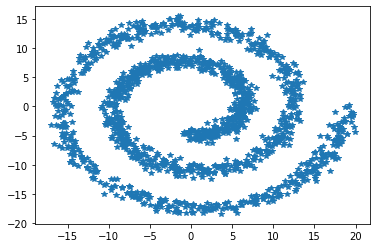

In [6]:
# generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5*np.pi*(1+3*np.random.rand(1,n_samples)) # 螺旋状数据
x = t*np.cos(t)
y = t*np.sin(t)

# 方便一次性处理x,y
X = np.concatenate((x,y))
X = X+0.7*np.random.randn(2,1500)

# plt.plot(x.T,y.T,'*') # 原来的
plt.plot(X[0,:],X[1,:],'*') # 加了噪音之后

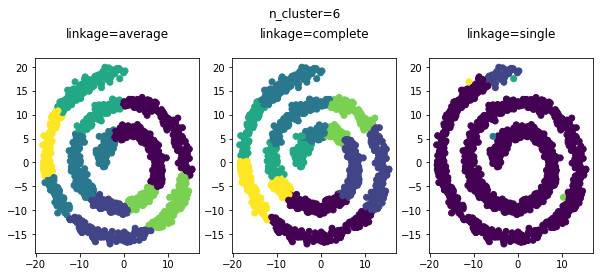

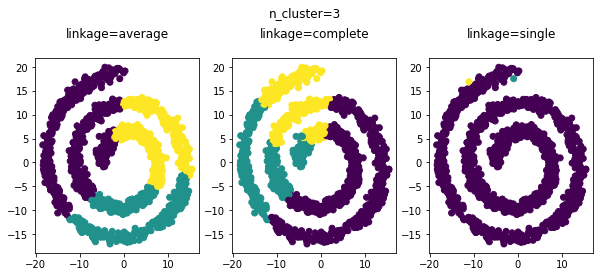

In [17]:
# 聚类
X = X.T
for n_cluster in (6,3):
    plt.figure(figsize=(10,4))

    for index, linkage in enumerate(('average','complete','single')):
        plt.subplot(1,3,index+1)
        model = AgglomerativeClustering(linkage=linkage, n_clusters=n_cluster)
        model.fit(X)
        y_pred = model.labels_
        plt.scatter(X[:,1],X[:,0],c=y_pred)
        plt.title('linkage=%s\n'%(linkage))
        plt.subplots_adjust(top=0.8)
        plt.suptitle('n_cluster=%s\n'%(n_cluster))

plt.show()

## EM vs. Spectral vs. Hierarchy

In [30]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [26]:
# generate 6 datasets
# 1 有监督 有噪音的圆环
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05
)
# 2 有监督 有噪音的月亮
noisy_moons = datasets.make_moons(
    n_samples=n_samples, noise=0.05
)
# 3 有监督 不均匀
varied = datasets.make_blobs(
    n_samples=n_samples, random_state=0, cluster_std=[1,2.5,0.5]
)
# 4 有监督 均匀
blobs = datasets.make_blobs(
    n_samples=n_samples, random_state=0
)
# 5
X, y = datasets.make_blobs(
    n_samples=n_samples, random_state=170
)
X_aniso = np.dot(X,[[0.6,-0.6],[-0.4,0.8]])
aniso = (X_aniso,y)
# 6 无监督 随机生成
no_structure = np.random.rand(n_samples,2),None

titles = ['noisy_circles','noisy_moons','varied','blobs','aniso','no_structure']

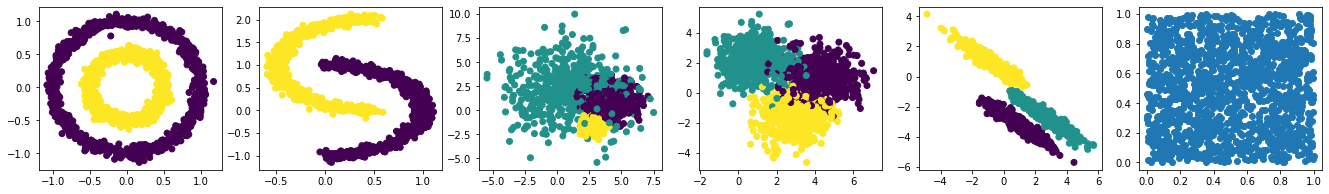

In [27]:
# 绘制原始数据
# n_feature = 2
plt.figure(figsize=(23,3))
for index, data in enumerate([noisy_circles, noisy_moons, varied, blobs, aniso, no_structure]):
    plt.subplot(1,6,index+1)
    plt.scatter(data[0][:,1],data[0][:,0],c=data[1])

plt.show()

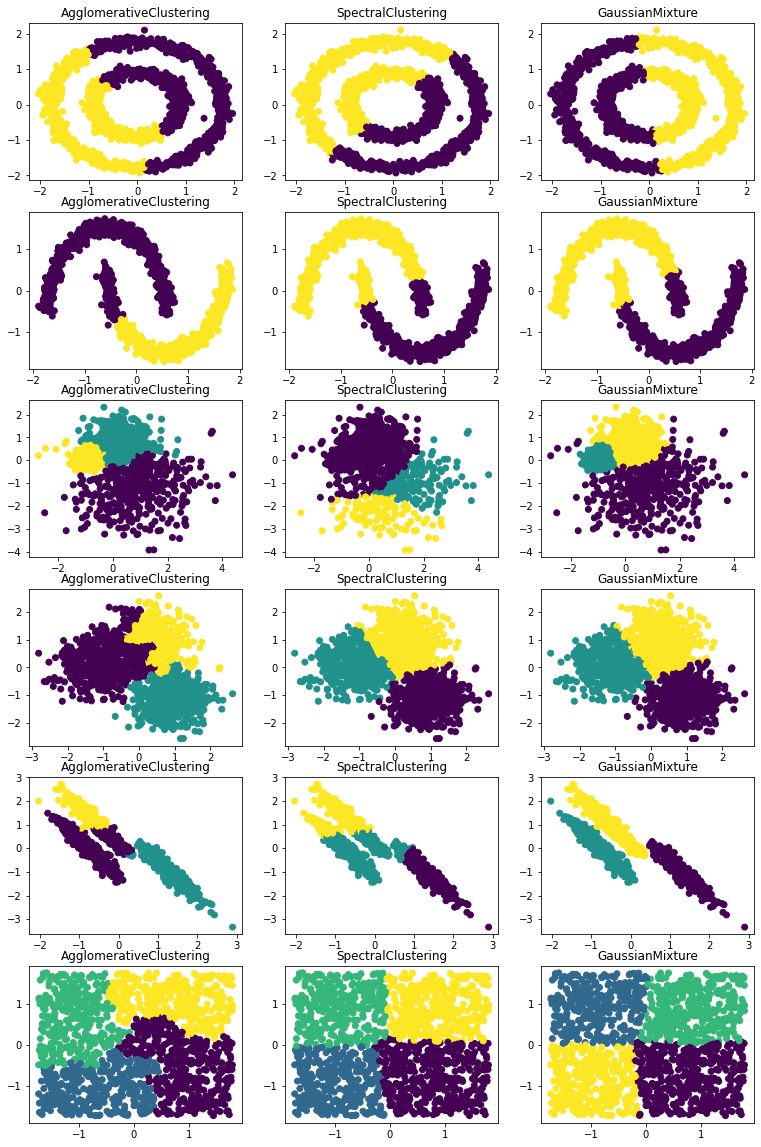

In [43]:
Datasets = [
    (noisy_circles, {'n_clusters':2}),
    (noisy_moons, {'n_clusters':2}),
    (varied, {'n_clusters':3}),
    (blobs, {'n_clusters':3}),
    (aniso, {'n_clusters':3}),
    (no_structure, {'n_clusters':4})
]

plot_num = 1
plt.figure(figsize=(13,13))
for index, (datas, param) in enumerate(Datasets):
    X, y = datas
    X = StandardScaler().fit_transform(X)
    # spectral & hierarchy
    spectral = cluster.SpectralClustering(n_clusters=param['n_clusters'])
    average_linkage = cluster.AgglomerativeClustering(n_clusters=param['n_clusters'])
    # EM
    gmm = mixture.GaussianMixture(n_components=param['n_clusters'])

    clustering_algorithms = [
        ('AgglomerativeClustering',average_linkage),
        ('SpectralClustering',spectral),
        ('GaussianMixture',gmm)
    ]

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        y_pred = algorithm.predict(X) if name=='GaussianMixture' else algorithm.labels_
        plt.subplot(6,3,plot_num)
        plot_num = plot_num+1
        plt.scatter(X[:,0],X[:,1],c=y_pred)
        plt.title(name)
        plt.subplots_adjust(top=1.3)

plt.show()